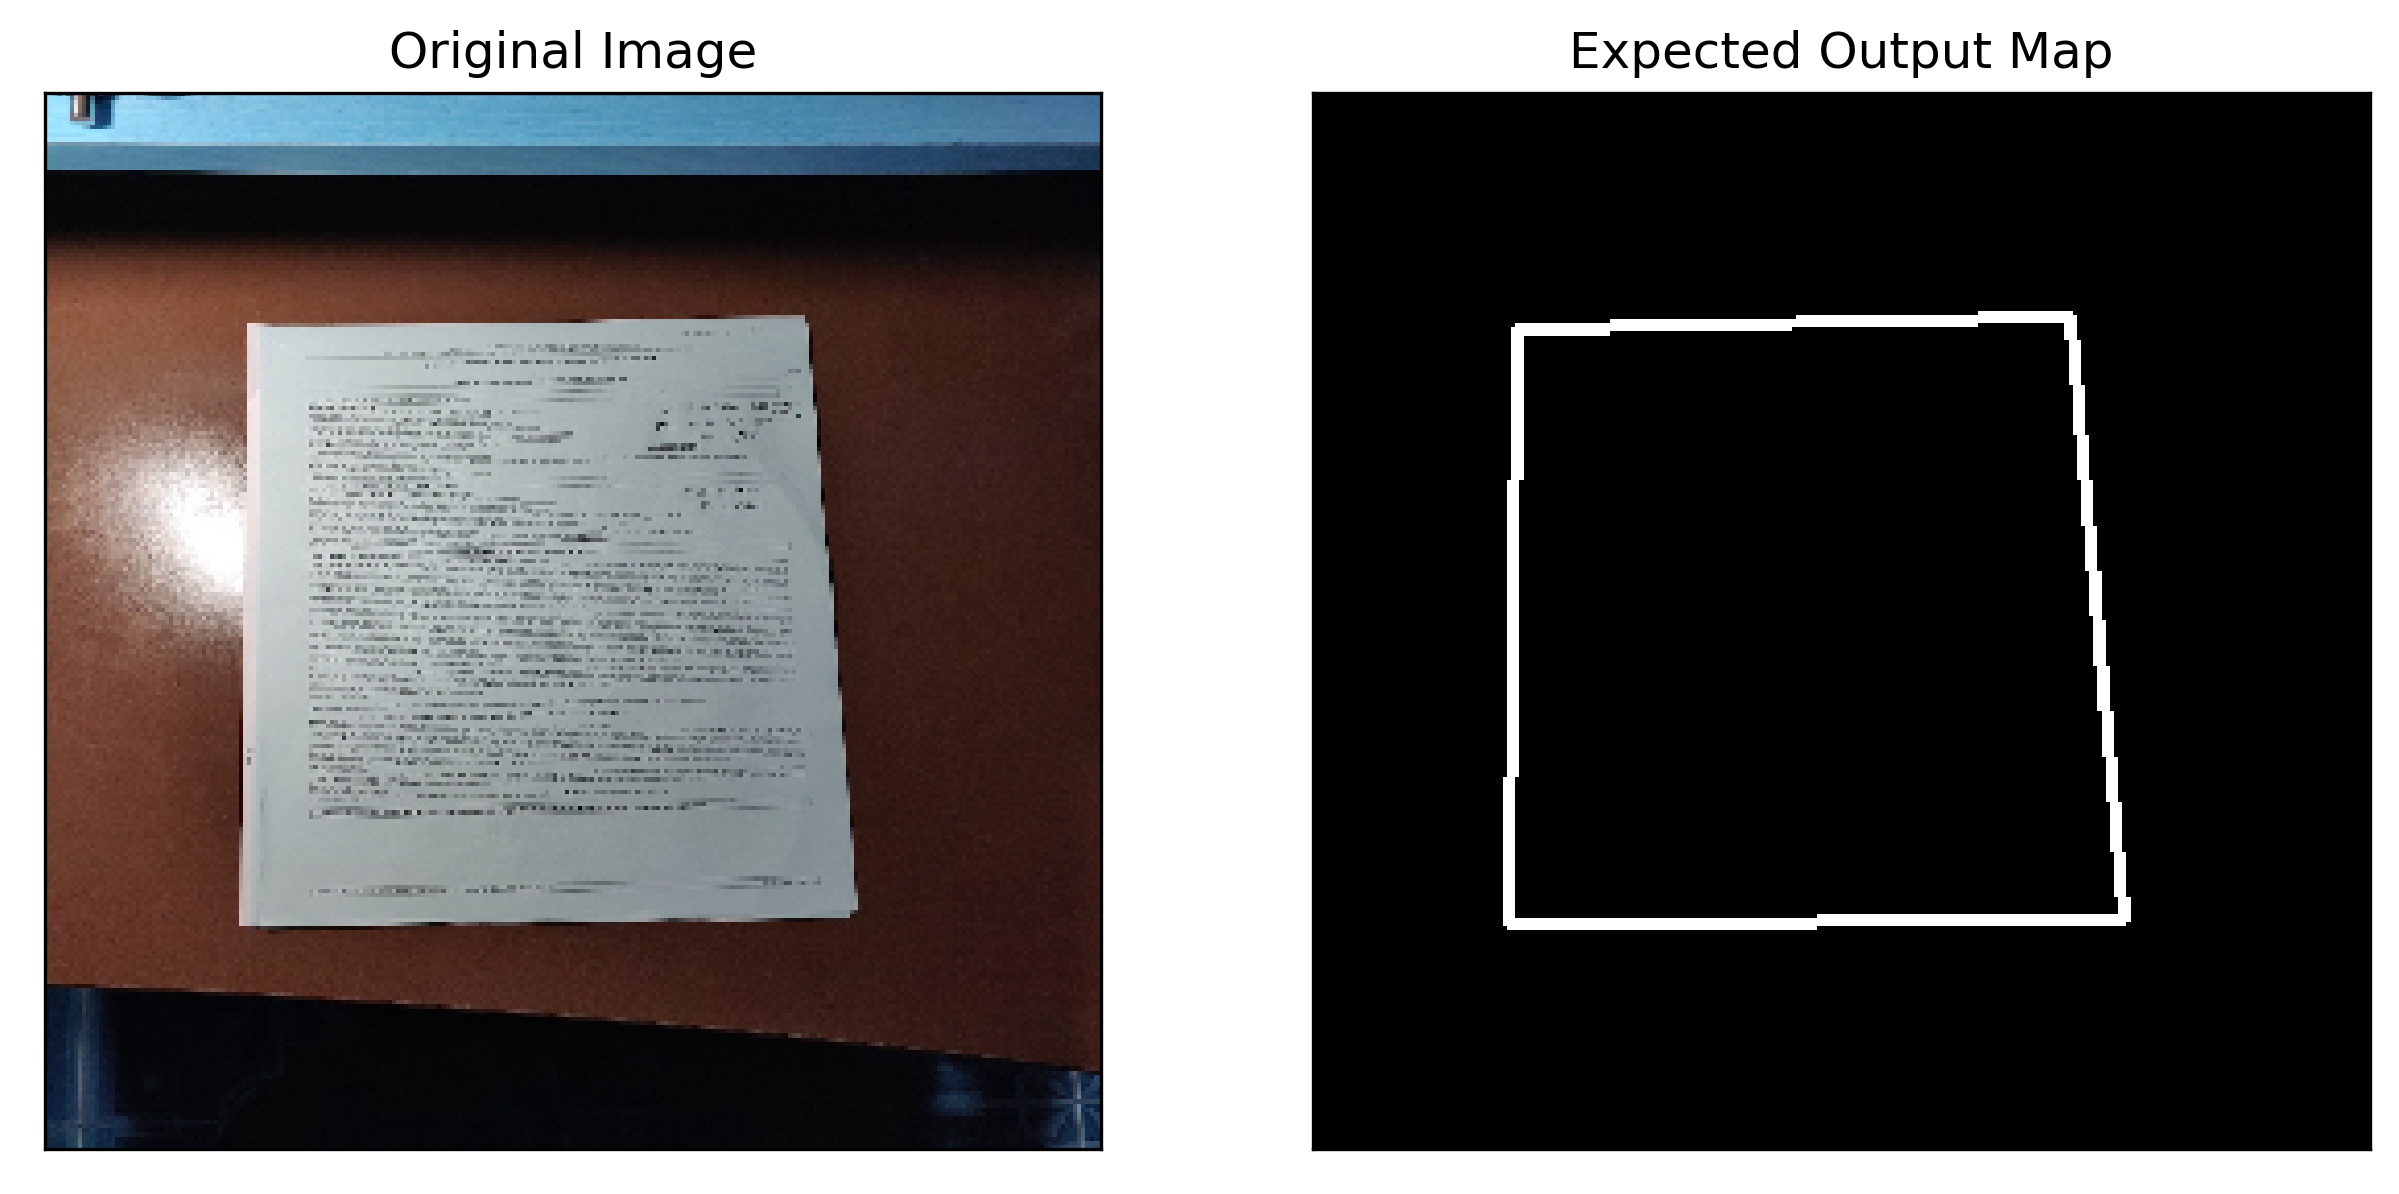

In [5]:
%matplotlib inline

import cv2
import numpy as np
from matplotlib import pyplot as plt

IMG_RESIZE = 256
SMALL_CORNER_THICKNESS = 2

def compute_corner_image_small(img, corners):
    target = np.zeros((IMG_RESIZE, IMG_RESIZE))

    # Calculate the new corner locations in the resized image
    new_coord = corners.copy()
    new_coord[:,0] = new_coord[:,0]*IMG_RESIZE/img.shape[1]
    new_coord[:,1] = new_coord[:,1]*IMG_RESIZE/img.shape[0]

    cv2.polylines(target, np.int32([new_coord]), 1, 255, thickness=SMALL_CORNER_THICKNESS)
    #cv2.fillPoly(target, np.int32([corners]), 255)
    return target

img = cv2.imread('../../dataset/IMG_52.jpg')


corners = np.array([201,309,745,296,796,1082,194,1090]).reshape(-1,2)

img_cor = compute_corner_image_small(img, corners)
img_res = cv2.resize(img, (256, 256))

edges = cv2.Canny(img,230,240)

plt.figure(figsize=(10,10), dpi = 300)
plt.subplot(121),plt.imshow(img_res)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_cor,cmap = 'gray')
plt.title('Expected Output Map'), plt.xticks([]), plt.yticks([])

plt.show()

Text(0.5, 1, 'Corrected Output Map')

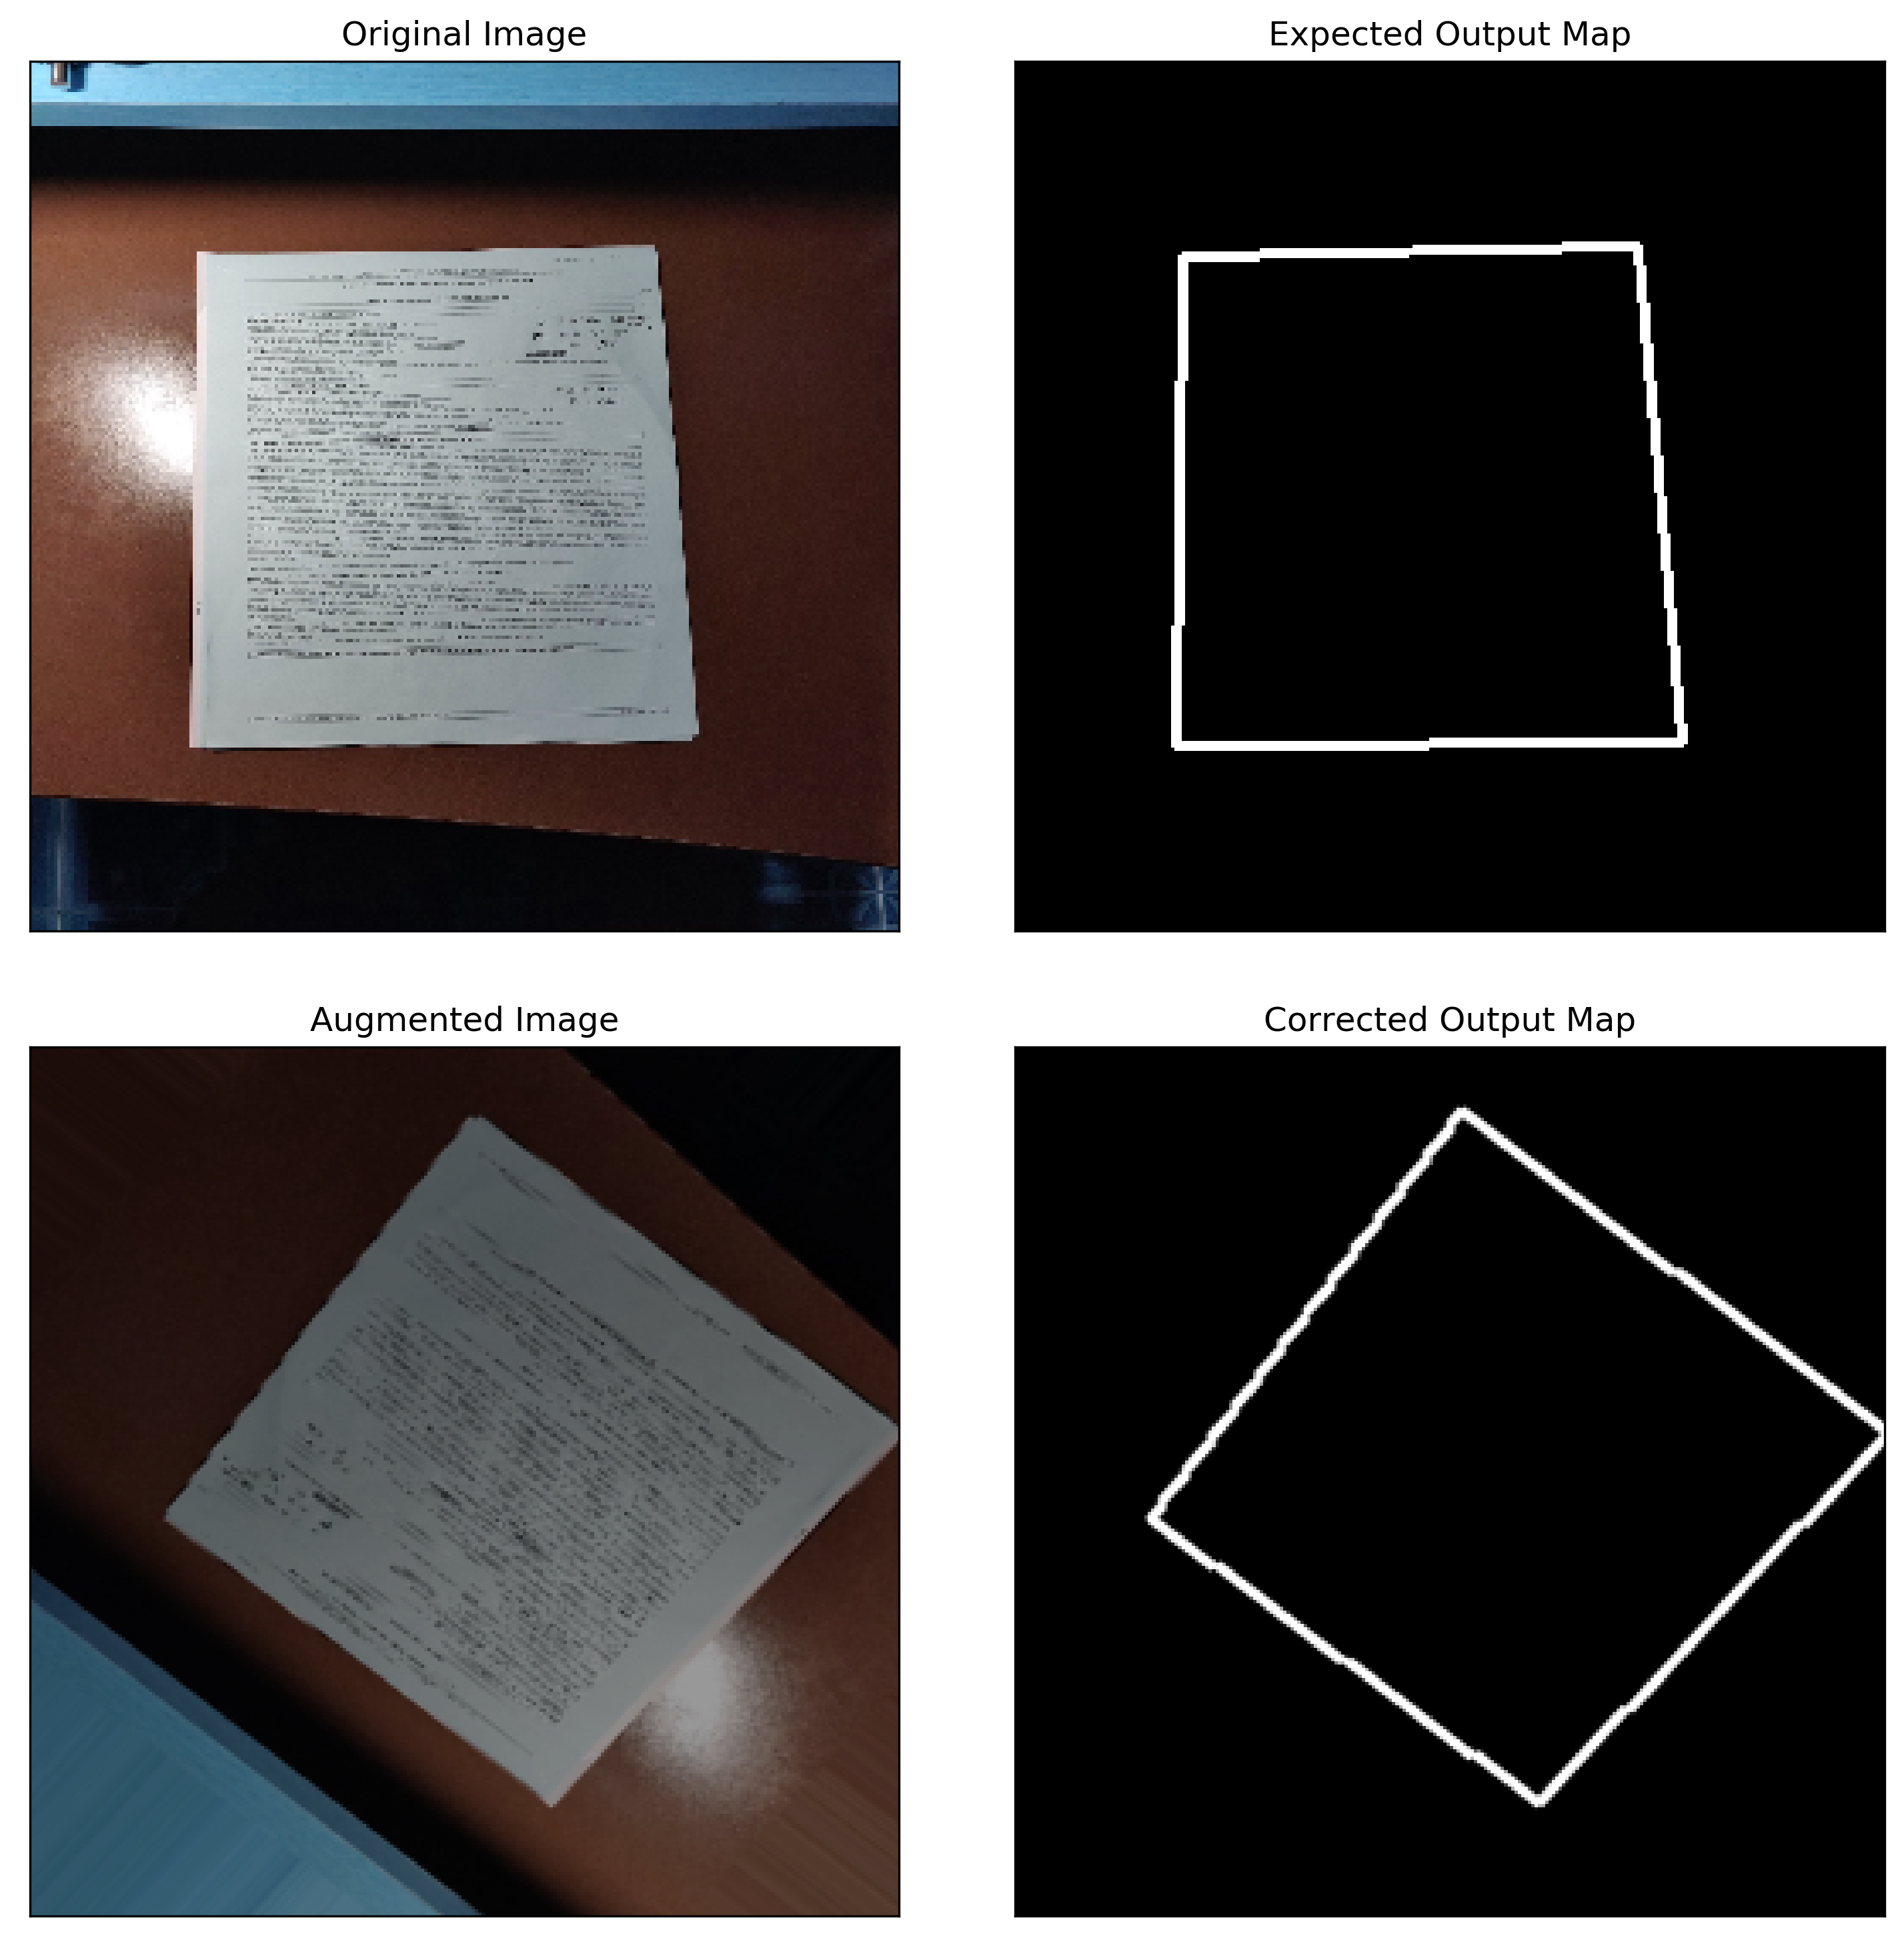

In [13]:
from keras_preprocessing.image import ImageDataGenerator
import random
from random import shuffle, randint

AUG_ROT = 90
AUG_Z = 0.2
AUG_T = 20
AUG_BRIG = 0.6

import cv2
import numpy as np
from matplotlib import pyplot as plt

IMG_RESIZE = 256
SMALL_CORNER_THICKNESS = 2

datagen = ImageDataGenerator()

def compute_corner_image_small(img, corners):
    target = np.zeros((IMG_RESIZE, IMG_RESIZE))

    # Calculate the new corner locations in the resized image
    new_coord = corners.copy()
    new_coord[:,0] = new_coord[:,0]*IMG_RESIZE/img.shape[1]
    new_coord[:,1] = new_coord[:,1]*IMG_RESIZE/img.shape[0]

    cv2.polylines(target, np.int32([new_coord]), 1, 255, thickness=SMALL_CORNER_THICKNESS)
    #cv2.fillPoly(target, np.int32([corners]), 255)
    return target

img = cv2.imread('../../dataset/IMG_52.jpg')


corners = np.array([201,309,745,296,796,1082,194,1090]).reshape(-1,2)

img_cor = compute_corner_image_small(img, corners)
img_res = cv2.resize(img, (256, 256))

rotation = randint(-AUG_ROT,AUG_ROT)
z_x = random.uniform(1-AUG_Z, 1+AUG_Z)
z_y = random.uniform(1-AUG_Z, 1+AUG_Z)
brig = random.uniform(1-AUG_BRIG, 1+AUG_BRIG)
t_x = randint(-AUG_T,AUG_T)
t_y = randint(-AUG_T,AUG_T)
flip_h = bool(random.getrandbits(1))
flip_v = bool(random.getrandbits(1))
params = {'theta':40, 'zx':z_x, 'zy':z_y, 'flip_horizontal':flip_h, 'flip_vertical':flip_v,
         "tx":t_x, "ty":t_y, "brightness": brig}
resized_img = datagen.apply_transform(x=img_res, transform_parameters=params)

# To rotate the corner image, it must be transformed to an RGB first and then back to grayscale
corner_rgb = img_cor[:,:, np.newaxis] 
corner_rgb = np.repeat(corner_rgb, 3, axis=2)
params_nobrig = {'theta':40, 'zx':z_x, 'zy':z_y, 'flip_horizontal':flip_h, 'flip_vertical':flip_v,
         "tx":t_x, "ty":t_y}

np_img = resized_img.astype('float32') / 255

rotated_corner_rgb = datagen.apply_transform(x=corner_rgb, transform_parameters=params_nobrig)
resized_corner = rotated_corner_rgb.mean(axis=2)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10), dpi=300)
fig.tight_layout() # Or equivalently,  "fig.tight_layout()"

for r in axes:
    for c in r:
        c.set_xticks([])
        c.set_yticks([])

#plt.figure(, dpi = 300)
axes[0][0].imshow(img_res)
axes[0][0].set_title('Original Image')
axes[0][1].imshow(img_cor,cmap = 'gray')
axes[0][1].set_title('Expected Output Map')

axes[1][0].imshow(np_img)
axes[1][0].set_title('Augmented Image')
axes[1][1].imshow(resized_corner,cmap = 'gray')
axes[1][1].set_title('Corrected Output Map')